In [7]:
using Revise, DeconvOptim, TestImages, Images, FFTW, Noise, ImageView

# custom image views
imshow_m(args...) = imshow(cat(args..., dims=3))
h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    colorview(Gray, img)
end

h_view (generic function with 1 method)

# Prepare Noisy Image and PSF

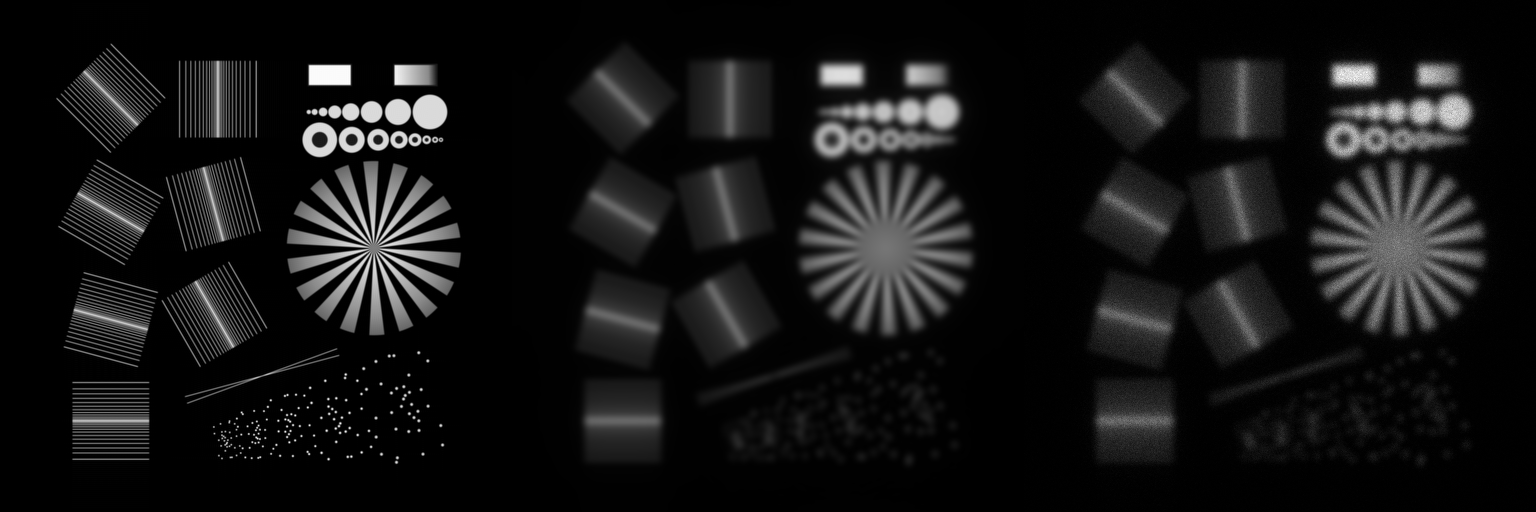

In [8]:
# load test images
img = 300 .* convert(Array{Float32}, channelview(testimage("resolution_test_512")))

psf = generate_psf(size(img), 30)

# create a blurred, noisy version of that image
img_b = conv_psf(img, psf, [1, 2])
img_n = poisson(img_b, 300);

h_view(img, img_b, img_n)

# Let's test Good's roughness

 27.664101 seconds (237.69 M allocations: 26.634 GiB, 6.04% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.093241e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.70e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.78e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.77e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.46e-13 ≰ 0.0e+00
    |g(x)|                 = 2.47e-04 ≰ 1.0e-08

 * Work counters
    Seconds run:   27  (vs limit Inf)
    Iterations:    100
    f(x) calls:    301
    ∇f(x) calls:   301

  4.308109 seconds (37.02 M allocations: 4.171 GiB, 4.20% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.093219e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.72e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.78e-02 ≰ 0.

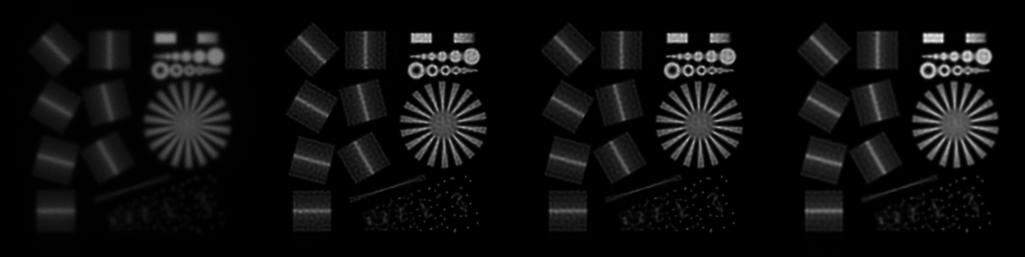

In [9]:
@time resGR100, optim_res = deconvolution(img_n, psf, regularizer=GR(), iterations=100)
@show optim_res

@time resGR15, optim_res = deconvolution(img_n, psf, regularizer=GR(), iterations=15)
@show optim_res

@time resGR15_2, optim_res = deconvolution(img_n, psf, λ=0.05, regularizer=GR(), iterations=15)
@show optim_res


h_view(img_n, resGR100, resGR15, resGR15_2)

# Let's test Total Variation

  8.997631 seconds (1.78 M allocations: 9.335 GiB, 3.04% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.065152e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.29e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.44e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.17e+01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.65e-07 ≰ 0.0e+00
    |g(x)|                 = 1.46e+00 ≰ 1.0e-08

 * Work counters
    Seconds run:   8  (vs limit Inf)
    Iterations:    50
    f(x) calls:    151
    ∇f(x) calls:   151

  3.475083 seconds (1.74 M allocations: 2.957 GiB, 3.28% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.065008e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.92e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.64e-02 ≰ 0.0e+00


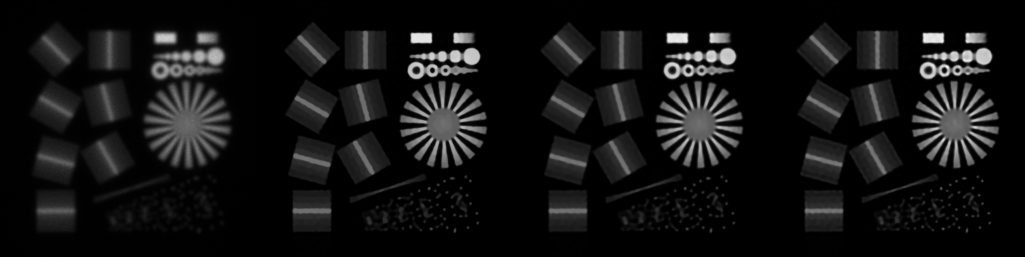

In [10]:
@time resTV50, optim_res = deconvolution(img_n, psf, regularizer=TV(), iterations=50)
@show optim_res
 
@time resTV15, optim_res = deconvolution(img_n, psf, regularizer=TV(), iterations=15)
@show optim_res
 
@time resTV15_2, optim_res = deconvolution(img_n, psf, λ=0.005, regularizer=TV(), iterations=15)
@show optim_res

h_view(img_n, resTV50, resTV15, resTV15_2)

# Let's test Tikhonov

  3.477415 seconds (1.78 M allocations: 2.838 GiB, 3.01% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.066328e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.36e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.24e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.02e+02 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.95e-06 ≰ 0.0e+00
    |g(x)|                 = 1.10e+01 ≰ 1.0e-08

 * Work counters
    Seconds run:   3  (vs limit Inf)
    Iterations:    15
    f(x) calls:    44
    ∇f(x) calls:   44

  3.992447 seconds (1.62 M allocations: 2.893 GiB, 2.76% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.065939e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 3.38e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.84e-02 ≰ 0.0e+00
  

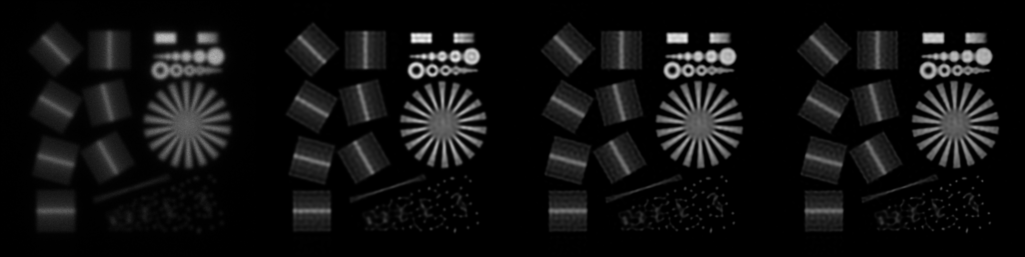

In [11]:
@time resTik1, optim_res = deconvolution(img_n, psf, λ=0.001, regularizer=Tikhonov(), iterations=15)
@show optim_res


@time resTik2, optim_res = deconvolution(img_n, psf, λ=0.0001, 
                    regularizer=Tikhonov(mode="spatial_grad_square"), iterations=15)
@show optim_res

@time resTik3, optim_res = deconvolution(img_n, psf, λ=0.0001, 
    regularizer=Tikhonov(mode="identity"), iterations=15)
@show optim_res

h_view(img_n, resTik1, resTik2, resTik3)

# Let's test without regularizer 

  7.927100 seconds (55.77 k allocations: 8.492 GiB, 2.49% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.067334e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 2.85e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.08e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.75e+00 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.27e-07 ≰ 0.0e+00
    |g(x)|                 = 2.90e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   8  (vs limit Inf)
    Iterations:    50
    f(x) calls:    148
    ∇f(x) calls:   148

  2.812089 seconds (17.54 k allocations: 2.695 GiB, 12.30% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.067227e+07

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 8.05e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.80e-02 ≰ 0.0e+

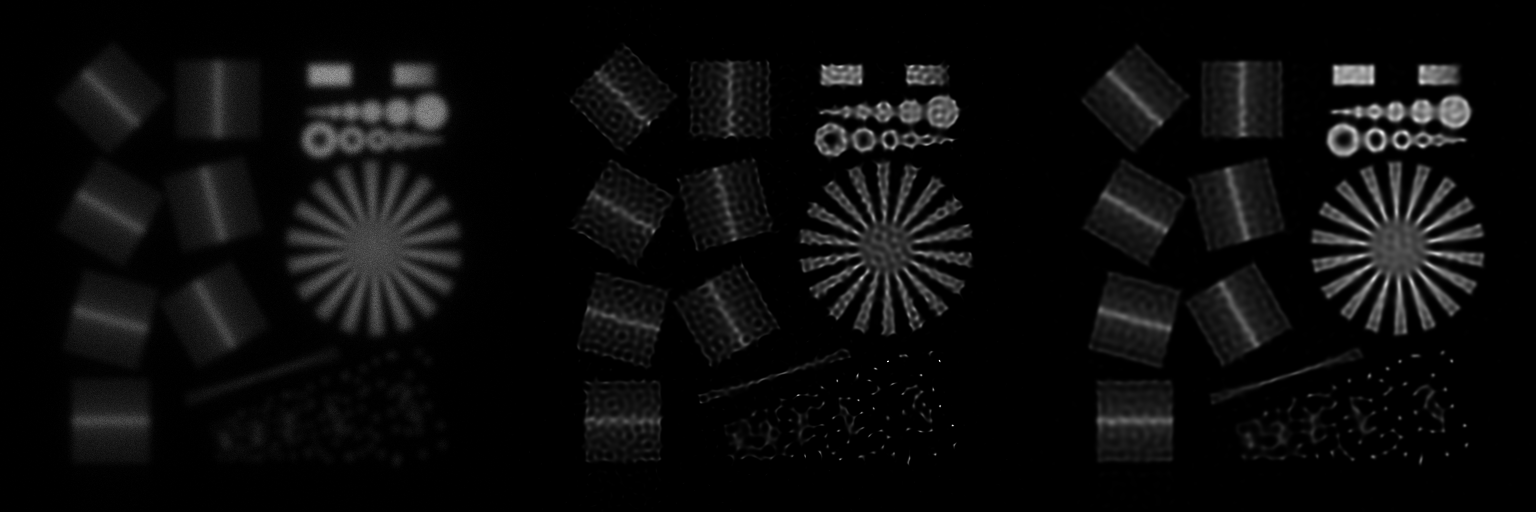

In [16]:
@time res100, optim_res = deconvolution(img_n, psf, regularizer=nothing, iterations=50)
@show optim_res

@time res15, optim_res = deconvolution(img_n, psf, regularizer=nothing, iterations=15)
@show optim_res

h_view(img_n, 0.7 .* res100, res15)

## Let's have a look at good results of some of the regularizers next to each other.

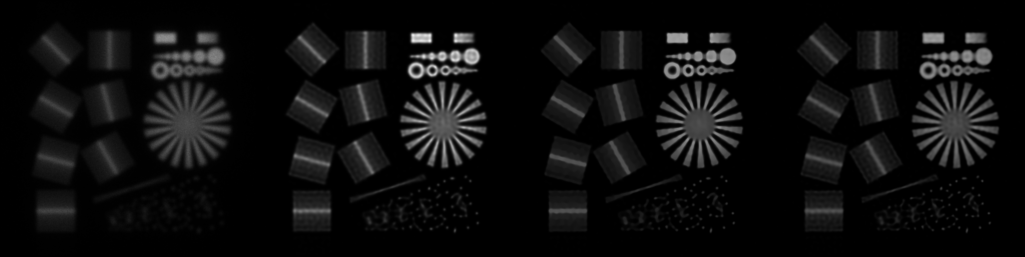

In [12]:
h_view(img_n, resGR15_2, resTV15_2, resTik3)